# ECE 491 Quiz 3



## Import Required Libraries

Imported allthe necessary libraries for the quiz solutions including NumPy for numerical operations, Matplotlib for plotting, TensorFlow/Keras for deep learning, and Seaborn for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
TensorFlow version: 2.20.0
NumPy version: 2.2.6


## Q1 — 2-D Convolution

### Convolution Function Implementation

First we implement the `conv2dNoFlip` function that performs 2-D convolution without flipping the filter kernel. This function supports different stride values.

In [2]:
def conv2dNoFlip(inputImage, filterKernel, stride=1):
    """Perform 2-D convolution without flipping the filter kernel."""
    imageHeight, imageWidth = inputImage.shape
    filterHeight, filterWidth = filterKernel.shape
    
    outputHeight = (imageHeight - filterHeight) // stride + 1
    outputWidth = (imageWidth - filterWidth) // stride + 1
    convOutput = np.zeros((outputHeight, outputWidth))
    
    for i in range(outputHeight):
        for j in range(outputWidth):
            regionOfInterest = inputImage[i*stride:i*stride+filterHeight, 
                                        j*stride:j*stride+filterWidth]
            convOutput[i, j] = np.sum(regionOfInterest * filterKernel)
    
    return convOutput

print("conv2dNoFlip function implemented successfully!")

conv2dNoFlip function implemented successfully!


### Define Sample Image and Filter

Create a small sample 2-D image matrix and a 3×3 filter for demonstration purposes.

In [3]:
sampleImage = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

filterKernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

print("Sample Image (5x5):")
print(sampleImage)
print("\nFilter Kernel (3x3):")
print(filterKernel)

Sample Image (5x5):
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Filter Kernel (3x3):
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


### Convolution with Stride = 1

Apply the convolution function with stride=1 and display the output matrix.

In [15]:
convOutputStride1 = conv2dNoFlip(sampleImage, filterKernel, stride=1)

print("Convolution Output with Stride = 1:")
print(convOutputStride1)
print(f"Output shape: {convOutputStride1.shape}")

Convolution Output with Stride = 1:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Output shape: (3, 3)


### Convolution with Stride = 2

Apply the convolution function with stride=2 and compare results with stride=1.

In [5]:
convOutputStride2 = conv2dNoFlip(sampleImage, filterKernel, stride=2)

print("Convolution Output with Stride = 2:")
print(convOutputStride2)
print(f"Output shape: {convOutputStride2.shape}")

print("\nComparison:")
print(f"Stride 1 output shape: {convOutputStride1.shape}")
print(f"Stride 2 output shape: {convOutputStride2.shape}")

Convolution Output with Stride = 2:
[[0. 0.]
 [0. 0.]]
Output shape: (2, 2)

Comparison:
Stride 1 output shape: (3, 3)
Stride 2 output shape: (2, 2)


### Average Pooling Implementation

Implement `avgPool2x2` function for 2×2 average pooling with stride = 2.

In [6]:
def avgPool2x2(inputMatrix):
    """Perform 2×2 average pooling with stride = 2."""
    inputHeight, inputWidth = inputMatrix.shape
    outputHeight = inputHeight // 2
    outputWidth = inputWidth // 2
    pooledOutput = np.zeros((outputHeight, outputWidth))
    
    for i in range(outputHeight):
        for j in range(outputWidth):
            region = inputMatrix[i*2:(i*2)+2, j*2:(j*2)+2]
            pooledOutput[i, j] = np.mean(region)
    
    return pooledOutput

pooledOutput = avgPool2x2(convOutputStride1)

print("Average Pooling Applied to Convolution Output (Stride 1):")
print("Original shape:", convOutputStride1.shape)
print("Pooled shape:", pooledOutput.shape)
print("Pooled output:")
print(pooledOutput)

Average Pooling Applied to Convolution Output (Stride 1):
Original shape: (3, 3)
Pooled shape: (1, 1)
Pooled output:
[[0.]]


### Visualize All Matrices

Display all intermediate matrices using both print statements and matplotlib visualizations for clear presentation.

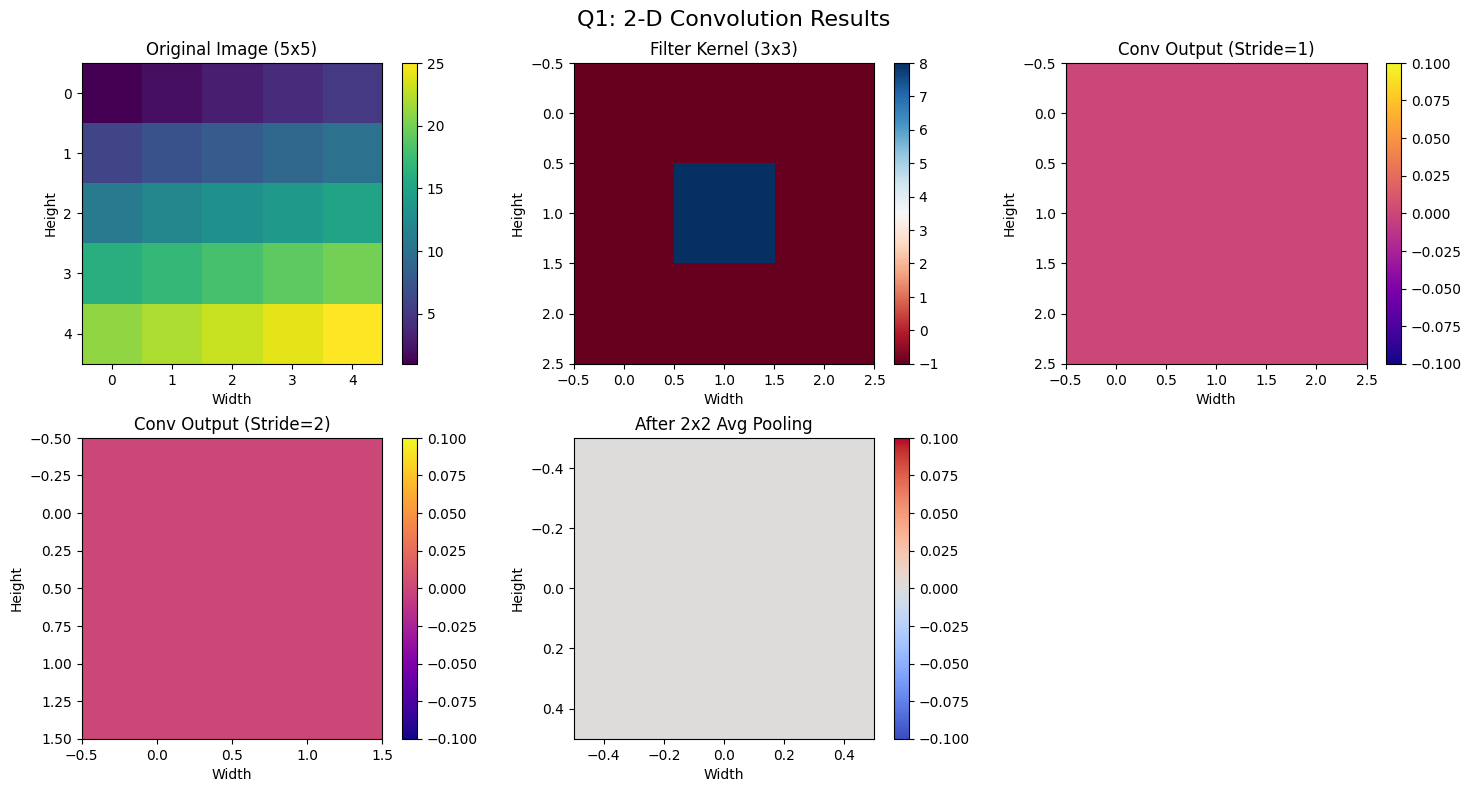

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Q1: 2-D Convolution Results', fontsize=16)

im1 = axes[0, 0].imshow(sampleImage, cmap='viridis', aspect='equal')
axes[0, 0].set_title('Original Image (5x5)')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Height')
plt.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(filterKernel, cmap='RdBu', aspect='equal')
axes[0, 1].set_title('Filter Kernel (3x3)')
axes[0, 1].set_xlabel('Width')
axes[0, 1].set_ylabel('Height')
plt.colorbar(im2, ax=axes[0, 1])

im3 = axes[0, 2].imshow(convOutputStride1, cmap='plasma', aspect='equal')
axes[0, 2].set_title('Conv Output (Stride=1)')
axes[0, 2].set_xlabel('Width')
axes[0, 2].set_ylabel('Height')
plt.colorbar(im3, ax=axes[0, 2])

im4 = axes[1, 0].imshow(convOutputStride2, cmap='plasma', aspect='equal')
axes[1, 0].set_title('Conv Output (Stride=2)')
axes[1, 0].set_xlabel('Width')
axes[1, 0].set_ylabel('Height')
plt.colorbar(im4, ax=axes[1, 0])

im5 = axes[1, 1].imshow(pooledOutput, cmap='coolwarm', aspect='equal')
axes[1, 1].set_title('After 2x2 Avg Pooling')
axes[1, 1].set_xlabel('Width')
axes[1, 1].set_ylabel('Height')
plt.colorbar(im5, ax=axes[1, 1])

axes[1, 2].remove()
plt.tight_layout()
plt.show()

## Q2 — 1×1 Convolutional Layer

### Setup Input Matrix and Parameters

Define the input matrix and kernel parameters (weights=[1, 2, 3], bias=-1) for the 1×1 convolution operation.

In [8]:
inputMatrix = np.array([
    [[1, 1, 1, 1],
     [0, 0, 0, 0],
     [2, 2, 2, 2]],
    
    [[1, 1, 1, 1],
     [0, 0, 0, 0],
     [2, 2, 2, 2]],
    
    [[1, 1, 1, 1],
     [0, 0, 0, 0],
     [2, 2, 2, 2]]
])

kernelWeights = np.array([1, 2, 3])
biasValue = -1

print("Input Matrix Shape:", inputMatrix.shape)
print("Input Matrix (Channel 1):")
print(inputMatrix[0])
print("\nKernel Weights:", kernelWeights)
print("Bias Value:", biasValue)

Input Matrix Shape: (3, 3, 4)
Input Matrix (Channel 1):
[[1 1 1 1]
 [0 0 0 0]
 [2 2 2 2]]

Kernel Weights: [1 2 3]
Bias Value: -1


### Manual Computation

Perform manual calculation of the 1×1 convolution output with detailed step-by-step comments explaining how each weight and bias contributes.

In [9]:
print("Manual 1×1 Convolution Computation:")
print("=====================================")

outputHeight, outputWidth = inputMatrix.shape[1], inputMatrix.shape[2]
manualOutput = np.zeros((outputHeight, outputWidth))

for i in range(outputHeight):
    for j in range(outputWidth):
        channel1Value = inputMatrix[0, i, j]
        channel2Value = inputMatrix[1, i, j]
        channel3Value = inputMatrix[2, i, j]
        
        convResult = (kernelWeights[0] * channel1Value +
                     kernelWeights[1] * channel2Value +
                     kernelWeights[2] * channel3Value +
                     biasValue)
        
        manualOutput[i, j] = convResult
        
        print(f"Position ({i},{j}): {kernelWeights[0]}*{channel1Value} + {kernelWeights[1]}*{channel2Value} + {kernelWeights[2]}*{channel3Value} + {biasValue} = {convResult}")

print("\nManual Output Matrix:")
print(manualOutput)

Manual 1×1 Convolution Computation:
Position (0,0): 1*1 + 2*1 + 3*1 + -1 = 5
Position (0,1): 1*1 + 2*1 + 3*1 + -1 = 5
Position (0,2): 1*1 + 2*1 + 3*1 + -1 = 5
Position (0,3): 1*1 + 2*1 + 3*1 + -1 = 5
Position (1,0): 1*0 + 2*0 + 3*0 + -1 = -1
Position (1,1): 1*0 + 2*0 + 3*0 + -1 = -1
Position (1,2): 1*0 + 2*0 + 3*0 + -1 = -1
Position (1,3): 1*0 + 2*0 + 3*0 + -1 = -1
Position (2,0): 1*2 + 2*2 + 3*2 + -1 = 11
Position (2,1): 1*2 + 2*2 + 3*2 + -1 = 11
Position (2,2): 1*2 + 2*2 + 3*2 + -1 = 11
Position (2,3): 1*2 + 2*2 + 3*2 + -1 = 11

Manual Output Matrix:
[[ 5.  5.  5.  5.]
 [-1. -1. -1. -1.]
 [11. 11. 11. 11.]]


### NumPy Implementation

Implement the same 1×1 convolution using efficient NumPy operations and verify results match manual computation.

NumPy 1×1 Convolution Implementation:
NumPy Output Matrix:
[[ 5  5  5  5]
 [-1 -1 -1 -1]
 [11 11 11 11]]

Results match: True


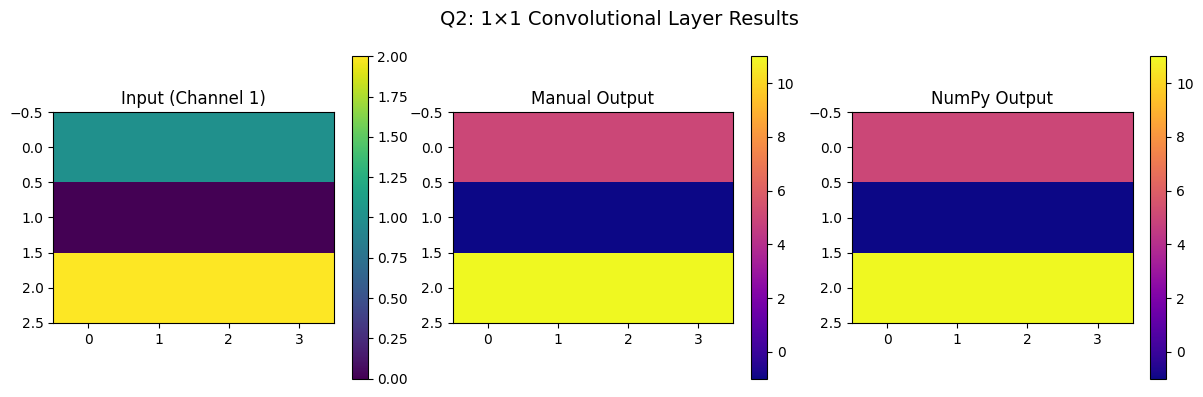

In [10]:
print("NumPy 1×1 Convolution Implementation:")
print("====================================")

numpyOutput = np.sum(inputMatrix * kernelWeights.reshape(-1, 1, 1), axis=0) + biasValue

print("NumPy Output Matrix:")
print(numpyOutput)

resultsMatch = np.allclose(manualOutput, numpyOutput)
print(f"\nResults match: {resultsMatch}")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Q2: 1×1 Convolutional Layer Results', fontsize=14)

im1 = axes[0].imshow(inputMatrix[0], cmap='viridis', aspect='equal')
axes[0].set_title('Input (Channel 1)')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(manualOutput, cmap='plasma', aspect='equal')
axes[1].set_title('Manual Output')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(numpyOutput, cmap='plasma', aspect='equal')
axes[2].set_title('NumPy Output')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

## Q3 — MobileNetV2 on Fashion-MNIST

### Load Fashion-MNIST Dataset

Load the Fashion-MNIST dataset using TensorFlow/Keras and inspect its structure.

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


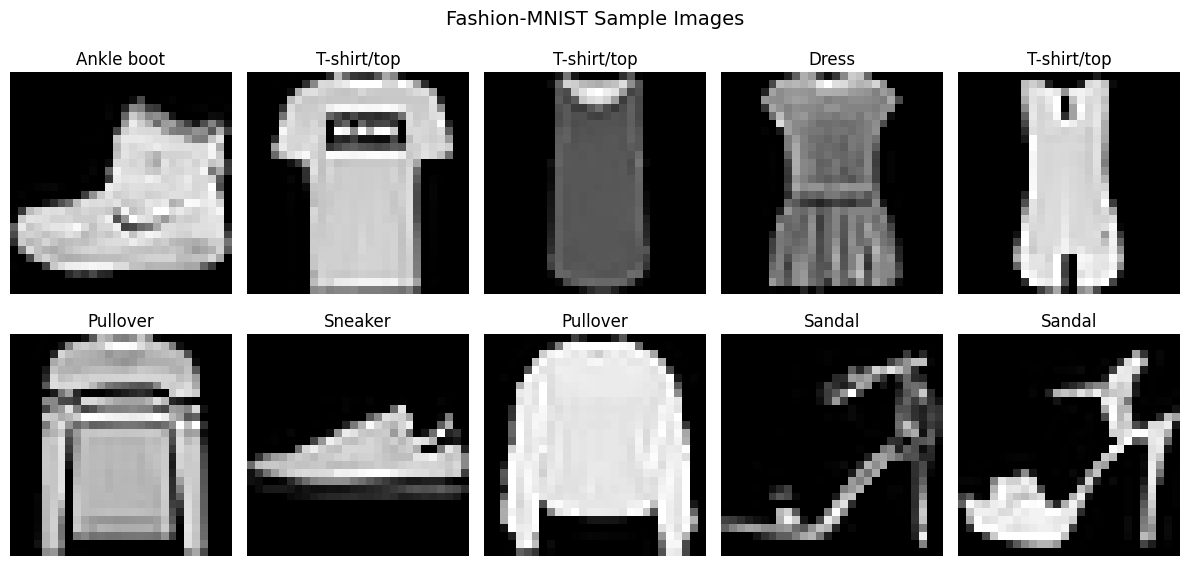

In [11]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.fashion_mnist.load_data()

classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training data shape: {xTrain.shape}")
print(f"Training labels shape: {yTrain.shape}")
print(f"Test data shape: {xTest.shape}")
print(f"Test labels shape: {yTest.shape}")
print(f"Number of classes: {len(classNames)}")
print(f"Class names: {classNames}")

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Fashion-MNIST Sample Images', fontsize=14)

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(xTrain[i], cmap='gray')
    axes[row, col].set_title(f'{classNames[yTrain[i]]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Preprocess Images

Resize grayscale images to 96×96 and convert to 3-channel format for MobileNetV2 compatibility.

Preprocessing images...
Processed training data shape: (60000, 96, 96, 3)
Processed test data shape: (10000, 96, 96, 3)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


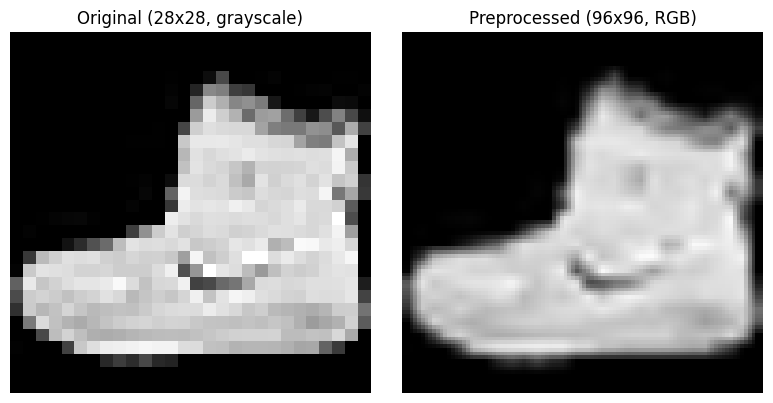

In [12]:
def preprocessImages(images):
    """Preprocess Fashion-MNIST images for MobileNetV2."""
    images = images.astype('float32') / 255.0
    images = tf.image.resize(images[..., np.newaxis], [96, 96])
    images = tf.repeat(images, 3, axis=-1)
    return images

print("Preprocessing images...")
xTrainProcessed = preprocessImages(xTrain)
xTestProcessed = preprocessImages(xTest)

yTrainCategorical = keras.utils.to_categorical(yTrain, 10)
yTestCategorical = keras.utils.to_categorical(yTest, 10)

print(f"Processed training data shape: {xTrainProcessed.shape}")
print(f"Processed test data shape: {xTestProcessed.shape}")
print(f"Training labels shape: {yTrainCategorical.shape}")
print(f"Test labels shape: {yTestCategorical.shape}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(xTrain[0], cmap='gray')
axes[0].set_title('Original (28x28, grayscale)')
axes[0].axis('off')

axes[1].imshow(xTrainProcessed[0])
axes[1].set_title('Preprocessed (96x96, RGB)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Build MobileNetV2 Model

Create MobileNetV2 model without top layer, add global average pooling and dense output layer for 10 classes.

In [13]:
def buildMobileNetV2Model():
    """Build a MobileNetV2 model for Fashion-MNIST classification."""
    baseModel = keras.applications.MobileNetV2(
        include_top=False,
        weights=None,
        input_shape=(96, 96, 3)
    )
    
    model = keras.Sequential([
        baseModel,
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax', name='predictions')
    ])
    
    return model

mobilenetModel = buildMobileNetV2Model()

print("MobileNetV2 Model Architecture:")
print("===============================")
mobilenetModel.summary()

totalParams = mobilenetModel.count_params()
print(f"\nTotal parameters: {totalParams:,}")

MobileNetV2 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 2,236,682 (8.53 MB)

 Non-trainable params: 34,112 (133.25 KB)


Total parameters: 2,270,794


### Compile and Train Model

Compile model with Adam optimizer (learning rate=1e-3), train for 10 epochs with batch_size=128 and validation_split=0.1.

In [14]:
learningRate = 1e-3
batchSize = 128
numberOfEpochs = 10
validationSplit = 0.1

mobilenetModel.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learningRate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"Model compiled with:")
print(f"- Optimizer: Adam (lr={learningRate})")
print(f"- Loss: categorical_crossentropy")
print(f"- Metrics: accuracy")
print(f"- Batch size: {batchSize}")
print(f"- Epochs: {numberOfEpochs}")
print(f"- Validation split: {validationSplit}")

print("\nStarting training...")
trainingHistory = mobilenetModel.fit(
    xTrainProcessed,
    yTrainCategorical,
    batch_size=batchSize,
    epochs=numberOfEpochs,
    validation_split=validationSplit,
    verbose=1
)

print("\nTraining completed!")

Model compiled with:
- Optimizer: Adam (lr=0.001)
- Loss: categorical_crossentropy
- Metrics: accuracy
- Batch size: 128
- Epochs: 10
- Validation split: 0.1

Starting training...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 451s 1s/step - accuracy: 0.7980 - loss: 0.5485 - val_accuracy: 0.0942 - val_loss: 2.4616
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.8886 - loss: 0.3047 - val_accuracy: 0.0942 - val_loss: 2.6579
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.9101 - loss: 0.2463 - val_accuracy: 0.0942 - val_loss: 2.8322
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.9186 - loss: 0.2205 - val_accuracy: 0.0942 - val_loss: 2.9455
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 426s 1s/step - accuracy: 0.9269 - loss: 0.2009 - val_accuracy: 0.0942 - val_loss: 2.9561
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.9315 - loss: 0.1860 - val_accuracy: 0.0942 - val_loss: 2.9937
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 444s 1

### Plot Training Curves

Create plots showing training vs validation loss and accuracy curves over epochs using matplotlib.

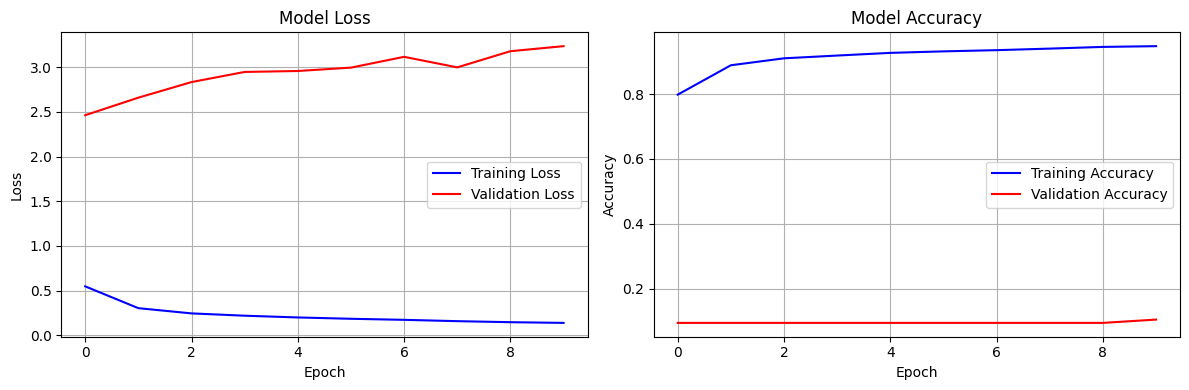


Final Training Metrics:
Training Loss: 0.1402
Training Accuracy: 0.9475
Validation Loss: 3.2336
Validation Accuracy: 0.1043


In [22]:
def plotTrainingHistory(history):
    """Plot training and validation loss and accuracy curves."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(history.history['loss'], 'b-', label='Training Loss')
    axes[0].plot(history.history['val_loss'], 'r-', label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    axes[1].set_title('Model Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

plotTrainingHistory(trainingHistory)

finalTrainLoss = trainingHistory.history['loss'][-1]
finalTrainAccuracy = trainingHistory.history['accuracy'][-1]
finalValLoss = trainingHistory.history['val_loss'][-1]
finalValAccuracy = trainingHistory.history['val_accuracy'][-1]

print(f"\nFinal Training Metrics:")
print(f"Training Loss: {finalTrainLoss:.4f}")
print(f"Training Accuracy: {finalTrainAccuracy:.4f}")
print(f"Validation Loss: {finalValLoss:.4f}")
print(f"Validation Accuracy: {finalValAccuracy:.4f}")

### Evaluate Model Performance

Compute test accuracy and generate confusion matrix visualization using seaborn heatmap.

Evaluating model on test set...

Test Results:
Test Loss: 3.2391
Test Accuracy: 0.1116


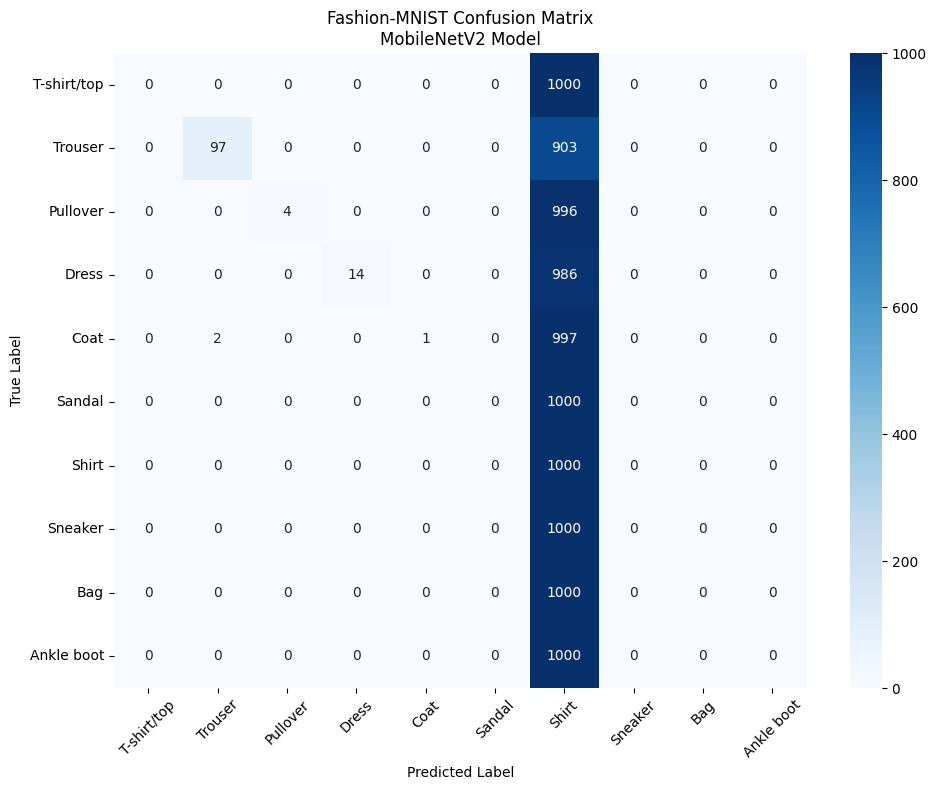


Per-Class Accuracy:
T-shirt/top: 0.000
Trouser: 0.097
Pullover: 0.004
Dress: 0.014
Coat: 0.001
Sandal: 0.000
Shirt: 1.000
Sneaker: 0.000
Bag: 0.000
Ankle boot: 0.000


In [17]:
print("Evaluating model on test set...")
testLoss, testAccuracy = mobilenetModel.evaluate(xTestProcessed, yTestCategorical, verbose=0)

print(f"\nTest Results:")
print(f"Test Loss: {testLoss:.4f}")
print(f"Test Accuracy: {testAccuracy:.4f}")

testPredictions = mobilenetModel.predict(xTestProcessed, verbose=0)
testPredictionsClasses = np.argmax(testPredictions, axis=1)

confusionMatrixData = confusion_matrix(yTest, testPredictionsClasses)

plt.figure(figsize=(10, 8))
sns.heatmap(confusionMatrixData, 
           annot=True, 
           fmt='d', 
           cmap='Blues',
           xticklabels=classNames, 
           yticklabels=classNames)
plt.title('Fashion-MNIST Confusion Matrix\nMobileNetV2 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

perClassAccuracy = confusionMatrixData.diagonal() / confusionMatrixData.sum(axis=1)
print(f"\nPer-Class Accuracy:")
for i, className in enumerate(classNames):
    print(f"{className}: {perClassAccuracy[i]:.3f}")

## Q4 — Single Neuron Training Step

### Single Neuron Setup

Define single neuron with tanh activation, initialize weight, bias, and training sample parameters.

In [18]:
initialWeight = 0.5
initialBias = 0.2
inputValue = 1.0
targetValue = 0.8
learningRateEta = 1.0

print("Single Neuron Training Step")
print("===========================")
print(f"Initial weight: {initialWeight}")
print(f"Initial bias: {initialBias}")
print(f"Input value: {inputValue}")
print(f"Target value: {targetValue}")
print(f"Learning rate (η): {learningRateEta}")
print(f"Activation function: tanh")

def tanhActivation(x):
    return np.tanh(x)

def tanhDerivative(x):
    return 1 - np.tanh(x)**2

Single Neuron Training Step
Initial weight: 0.5
Initial bias: 0.2
Input value: 1.0
Target value: 0.8
Learning rate (η): 1.0
Activation function: tanh


### Forward Pass Computation

Compute forward pass through the neuron: `output = tanh(weight * input + bias)`.

In [19]:
print("\nForward Pass:")
print("=============")

linearCombination = initialWeight * inputValue + initialBias
print(f"Linear combination (z): {initialWeight} × {inputValue} + {initialBias} = {linearCombination}")

neuronOutput = tanhActivation(linearCombination)
print(f"Neuron output: tanh({linearCombination}) = {neuronOutput:.6f}")

initialLoss = 0.5 * (targetValue - neuronOutput)**2
print(f"Loss: 0.5 × ({targetValue} - {neuronOutput:.6f})² = {initialLoss:.6f}")


Forward Pass:
Linear combination (z): 0.5 × 1.0 + 0.2 = 0.7
Neuron output: tanh(0.7) = 0.604368
Loss: 0.5 × (0.8 - 0.604368)² = 0.019136


### Backpropagation Step

Calculate gradients with respect to weight and bias using the chain rule:

- **Loss function**: $L = \frac{1}{2}(t - y)^2$ where $t$ is target, $y$ is output
- **Gradient w.r.t. weight**: $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w}$
- **Gradient w.r.t. bias**: $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial b}$

In [20]:
print("\nBackpropagation:")
print("================")

lossGradientWrtOutput = -(targetValue - neuronOutput)
print(f"∂L/∂y = -(target - output) = -({targetValue} - {neuronOutput:.6f}) = {lossGradientWrtOutput:.6f}")

activationGradient = tanhDerivative(linearCombination)
print(f"∂y/∂z = ∂tanh(z)/∂z = 1 - tanh²({linearCombination}) = {activationGradient:.6f}")

weightGradient = lossGradientWrtOutput * activationGradient * inputValue
print(f"∂L/∂w = (∂L/∂y) × (∂y/∂z) × (∂z/∂w)")
print(f"       = {lossGradientWrtOutput:.6f} × {activationGradient:.6f} × {inputValue}")
print(f"       = {weightGradient:.6f}")

biasGradient = lossGradientWrtOutput * activationGradient * 1
print(f"∂L/∂b = (∂L/∂y) × (∂y/∂z) × (∂z/∂b)")
print(f"      = {lossGradientWrtOutput:.6f} × {activationGradient:.6f} × 1")
print(f"      = {biasGradient:.6f}")


Backpropagation:
∂L/∂y = -(target - output) = -(0.8 - 0.604368) = -0.195632
∂y/∂z = ∂tanh(z)/∂z = 1 - tanh²(0.7) = 0.634740
∂L/∂w = (∂L/∂y) × (∂y/∂z) × (∂z/∂w)
       = -0.195632 × 0.634740 × 1.0
       = -0.124176
∂L/∂b = (∂L/∂y) × (∂y/∂z) × (∂z/∂b)
      = -0.195632 × 0.634740 × 1
      = -0.124176


### Weight and Bias Update

Update weight and bias using gradient descent with learning rate η=1:

- **Weight update**: $w_{new} = w_{old} - \eta \frac{\partial L}{\partial w}$
- **Bias update**: $b_{new} = b_{old} - \eta \frac{\partial L}{\partial b}$


Parameter Update:
New weight: 0.5 - 1.0 × -0.124176 = 0.624176
New bias: 0.2 - 1.0 × -0.124176 = 0.324176

After Update:
New linear combination: 0.624176 × 1.0 + 0.324176 = 0.948351
New neuron output: tanh(0.948351) = 0.739036
New loss: 0.5 × (0.8 - 0.739036)² = 0.001858

Summary of Changes:
Weight: 0.5 → 0.624176 (change: 0.124176)
Bias: 0.2 → 0.324176 (change: 0.124176)
Output: 0.604368 → 0.739036 (change: 0.134668)
Loss: 0.019136 → 0.001858 (change: -0.017278)


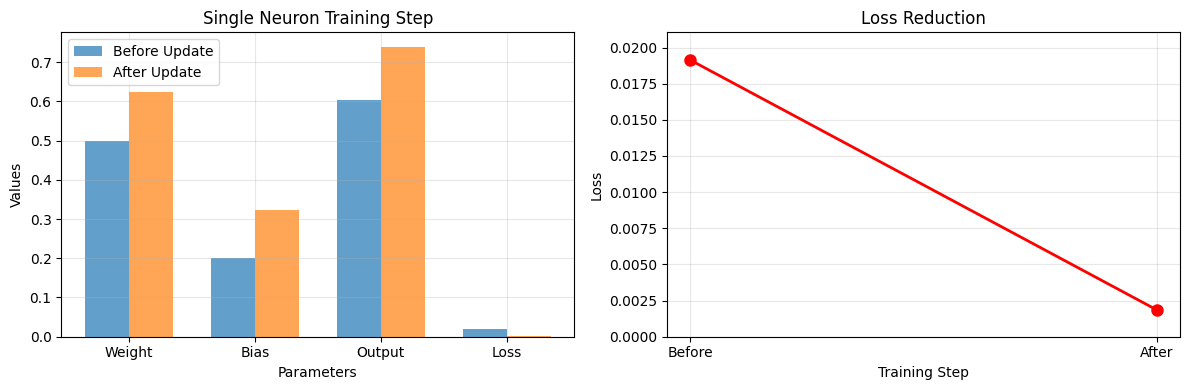

In [21]:
print("\nParameter Update:")
print("=================")

updatedWeight = initialWeight - learningRateEta * weightGradient
print(f"New weight: {initialWeight} - {learningRateEta} × {weightGradient:.6f} = {updatedWeight:.6f}")

updatedBias = initialBias - learningRateEta * biasGradient
print(f"New bias: {initialBias} - {learningRateEta} × {biasGradient:.6f} = {updatedBias:.6f}")

print("\nAfter Update:")
print("=============")

newLinearCombination = updatedWeight * inputValue + updatedBias
newNeuronOutput = tanhActivation(newLinearCombination)
newLoss = 0.5 * (targetValue - newNeuronOutput)**2

print(f"New linear combination: {updatedWeight:.6f} × {inputValue} + {updatedBias:.6f} = {newLinearCombination:.6f}")
print(f"New neuron output: tanh({newLinearCombination:.6f}) = {newNeuronOutput:.6f}")
print(f"New loss: 0.5 × ({targetValue} - {newNeuronOutput:.6f})² = {newLoss:.6f}")

print(f"\nSummary of Changes:")
print(f"==================")
print(f"Weight: {initialWeight} → {updatedWeight:.6f} (change: {updatedWeight - initialWeight:.6f})")
print(f"Bias: {initialBias} → {updatedBias:.6f} (change: {updatedBias - initialBias:.6f})")
print(f"Output: {neuronOutput:.6f} → {newNeuronOutput:.6f} (change: {newNeuronOutput - neuronOutput:.6f})")
print(f"Loss: {initialLoss:.6f} → {newLoss:.6f} (change: {newLoss - initialLoss:.6f})")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

parameters = ['Weight', 'Bias', 'Output', 'Loss']
before_values = [initialWeight, initialBias, neuronOutput, initialLoss]
after_values = [updatedWeight, updatedBias, newNeuronOutput, newLoss]

x = np.arange(len(parameters))
width = 0.35

axes[0].bar(x - width/2, before_values, width, label='Before Update', alpha=0.7)
axes[0].bar(x + width/2, after_values, width, label='After Update', alpha=0.7)
axes[0].set_xlabel('Parameters')
axes[0].set_ylabel('Values')
axes[0].set_title('Single Neuron Training Step')
axes[0].set_xticks(x)
axes[0].set_xticklabels(parameters)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot([0, 1], [initialLoss, newLoss], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Training Step')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Reduction')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Before', 'After'])
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, max(initialLoss, newLoss) * 1.1)

plt.tight_layout()
plt.show()

## Quiz 3 Solutions Summary

###  Q1 — 2-D Convolution
- Implemented `conv2dNoFlip()` function for convolution without kernel flipping
- Demonstrated convolution with stride=1 and stride=2
- Implemented `avgPool2x2()` for 2×2 average pooling
- Visualized all intermediate matrices with matplotlib

### Q2 — 1×1 Convolutional Layer  
- Performed manual computation of 1×1 convolution with detailed step-by-step calculations
- Implemented efficient NumPy version and verified results match
- Explained how each weight and bias contributes to the output

###  Q3 — MobileNetV2 on Fashion-MNIST
- Loaded and preprocessed Fashion-MNIST dataset (28×28 → 96×96, grayscale → RGB)
- Built MobileNetV2 model with custom top layers
- Trained for 10 epochs with Adam optimizer (lr=1e-3)
- Generated training/validation curves and confusion matrix

### Q4 — Single Neuron Training Step
- Implemented forward pass with tanh activation
- Computed gradients using backpropagation and chain rule
- Updated weight and bias with learning rate η=1
- Demonstrated loss reduction after one training step
